# Mini-Project IA 340 - David Korte

## 1. Research Questions 

How has the average life expectancy (years) changed since the 1900s to 2018? 

What gender has a higher life expectancy? 

How does the average life expectancy differ between races? 

## 2. Dataset Documentation 

*Source:* https://catalog.data.gov/dataset/nchs-death-rates-and-life-expectancy-at-birth

*Description:* This dataset is from the Centers for Disease Control and Prevention (CDC) - National Center for Health Statistics (NCHS). The dataset displays U.S. mortality trends since 1900, highlighting the differences in life expectancy at birth by race and sex.

*Time Period:* 1900 to 2018 

*Why did you choose the dataset?* I chose this dataset because I'm curious about exploring how life expectancy has increased/decreased over the last century. Additionally, I want to gain a better understanding of the % increase/decrease over time and identify any trends that may be apparent across specific populations (e.g., male vs. female or white vs. black). 

## 3. Import Data

In [32]:
import pandas as pd 

NCHS_data = pd.read_csv("s3://ia340-2025-fall-67/NCHS_-_Death_rates_and_life_expectancy_at_birth.csv")

NCHS_data.head()

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,1900,All Races,Both Sexes,47.3,2518.0
1,1901,All Races,Both Sexes,49.1,2473.1
2,1902,All Races,Both Sexes,51.5,2301.3
3,1903,All Races,Both Sexes,50.5,2379.0
4,1904,All Races,Both Sexes,47.6,2502.5


## 4. Clean Data

**Basic Info for NCHS Data / Descriptive Statistics**

In [45]:
print("NCHS Dataset Info:")
NCHS_data.info()

NCHS Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1065 entries, 0 to 1069
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1065 non-null   int64  
 1   Race                             1065 non-null   object 
 2   Sex                              1065 non-null   object 
 3   Average Life Expectancy (Years)  1065 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 41.6+ KB


In [46]:
print("\nDescriptive Statistics:")
print(NCHS_data.describe(include='all'))


Descriptive Statistics:
               Year       Race         Sex  Average Life Expectancy (Years)
count   1065.000000       1065        1065                      1065.000000
unique          NaN          3           3                              NaN
top             NaN  All Races  Both Sexes                              NaN
freq            NaN        357         355                              NaN
mean    1958.667606        NaN         NaN                        64.500188
std       34.176350        NaN         NaN                        11.843765
min     1900.000000        NaN         NaN                        29.100000
25%     1929.000000        NaN         NaN                        57.100000
50%     1959.000000        NaN         NaN                        66.800000
75%     1988.000000        NaN         NaN                        73.900000
max     2018.000000        NaN         NaN                        81.400000


**Handle Missing Values**

In [44]:
missing_summary = NCHS_data.isnull().sum()
print("\nMissing Values Summary:")
print(missing_summary)


Missing Values Summary:
Year                               0
Race                               0
Sex                                0
Average Life Expectancy (Years)    0
dtype: int64


**Handle Duplicates**

In [47]:
duplicates = NCHS_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
NCHS_data.drop_duplicates(inplace=True)


Number of duplicate rows: 0


**Dropping Row**

In [48]:
if "Age-adjusted Death Rate" in NCHS_data.columns:
    NCHS_data = NCHS_data.drop(columns=["Age-adjusted Death Rate"])
NCHS_data.head()


,Year,Race,Sex,Average Life Expectancy (Years)
0,1900,All Races,Both Sexes,47.3
1,1901,All Races,Both Sexes,49.1
2,1902,All Races,Both Sexes,51.5
3,1903,All Races,Both Sexes,50.5
4,1904,All Races,Both Sexes,47.6


I dropped the row 'Age-adjusted Death Rate' because it was not relevant to my research questions. There are no duplicate or missing values in key columns. No datatypes need to be fixed. 

## 5. Process / Aggregate 

In [49]:
import pandas as pd
df = NCHS_data.copy()
df = df.rename(columns={"Average Life Expectancy (Years)": "LifeExpectancy"})

df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

df = df.dropna(subset=["Year", "LifeExpectancy"])

df["Decade"] = (df["Year"] // 10) * 10

decade_summary = (
    df.groupby(["Decade", "Race", "Sex"])
    .agg({"LifeExpectancy": "mean"})
    .reset_index()
    .rename(columns={"Decade": "Year"})
)
decade_summary["LifeExpectancy"] = decade_summary["LifeExpectancy"].round(2)

print("\n=== Decade-Level Life Expectancy Summary ===")
print(decade_summary.tail(27))



=== Decade-Level Life Expectancy Summary ===
     Year       Race         Sex  LifeExpectancy
81   1990  All Races  Both Sexes           75.97
82   1990  All Races      Female           79.09
83   1990  All Races        Male           72.76
84   1990      Black  Both Sexes           70.03
85   1990      Black      Female           74.12
86   1990      Black        Male           65.75
87   1990      White  Both Sexes           76.67
88   1990      White      Female           79.70
89   1990      White        Male           73.59
90   2000  All Races  Both Sexes           77.61
91   2000  All Races      Female           80.11
92   2000  All Races        Male           74.98
93   2000      Black  Both Sexes           73.05
94   2000      Black      Female           76.25
95   2000      Black        Male           69.57
96   2000      White  Both Sexes           78.02
97   2000      White      Female           80.49
98   2000      White        Male           75.49
99   2010  All Races  B

This data summary table shows the new variable decade average for Race (All Race, White, and Black) and Sex (Both Sex, Male, and Female). I made this table to gain familiarity with how the average life expectancy has fluctuated since the 1900s. I wanted to understand the trends of the most recent decade, so I printed the tail of the summary going back three decades to the 1990s. This table shows that the life expectancy for all races and both sexes has increased from 75.97 to 78.73. However, the summary lacks a complete view of the most recent decade, as it only includes data up to 2018 and omits the years 2019 and 2020, which are essential for accurately capturing the full trend across the 2010s. 

# 6. Query 

In [27]:
filtered_df = NCHS_data[
    (NCHS_data["Race"] == "All Races") &
    (NCHS_data["Sex"] == "Both Sexes")
]

print(filtered_df.tail(20))

     Year       Race         Sex  LifeExpectancy
99   1999  All Races  Both Sexes            76.7
100  2000  All Races  Both Sexes            76.8
101  2001  All Races  Both Sexes            77.0
102  2002  All Races  Both Sexes            77.0
103  2003  All Races  Both Sexes            77.6
104  2004  All Races  Both Sexes            77.5
105  2005  All Races  Both Sexes            77.6
106  2006  All Races  Both Sexes            77.8
107  2007  All Races  Both Sexes            78.1
108  2008  All Races  Both Sexes            78.2
109  2009  All Races  Both Sexes            78.5
110  2010  All Races  Both Sexes            78.7
111  2011  All Races  Both Sexes            78.7
112  2012  All Races  Both Sexes            78.8
113  2013  All Races  Both Sexes            78.8
114  2014  All Races  Both Sexes            78.9
115  2015  All Races  Both Sexes            78.7
116  2016  All Races  Both Sexes            78.7
117  2017  All Races  Both Sexes            78.6
118  2018  All Races

I decided to filter the data only to show 'All Races' and 'Both Sexes' to help gain familiarity with the overall averages for everyone in the United States. This summary table shows a gradual increase from 1999, at 76.7, to 78.7. One interesting aspect of this summary is that the average life expectancy for everyone in the United States has been decreasing since 2014 (78.9). 

# 7. Visualize 

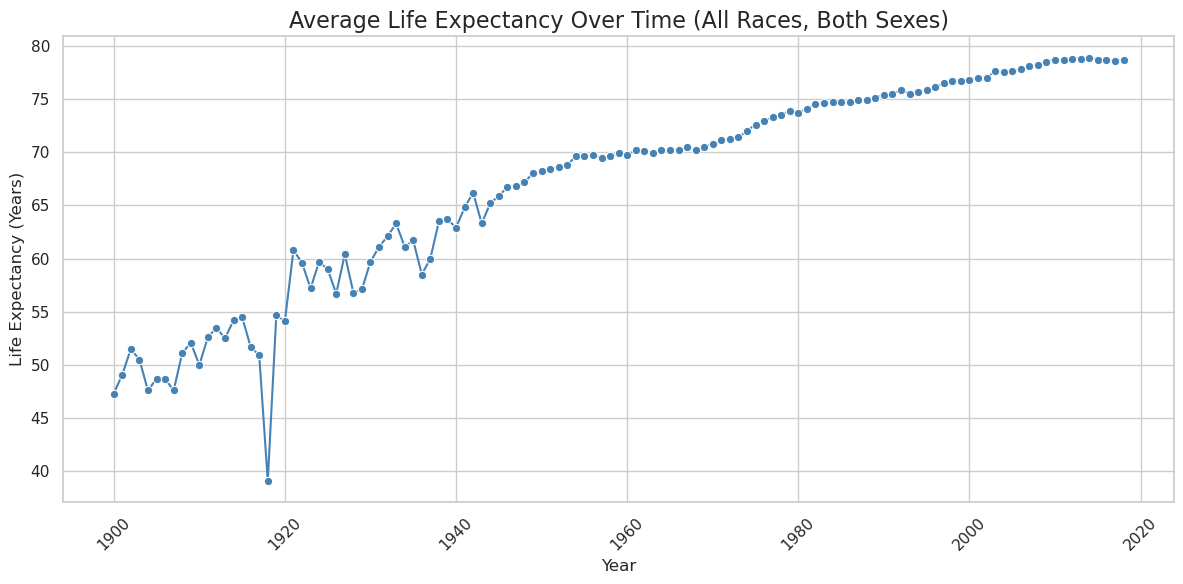

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = filtered_df.rename(columns={"Average Life Expectancy (Years)": "LifeExpectancy"})

filtered_df["Year"] = pd.to_numeric(filtered_df["Year"], errors="coerce")

filtered_df = filtered_df.dropna(subset=["Year", "LifeExpectancy"])

filtered_df = filtered_df.sort_values("Year")

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x="Year", y="LifeExpectancy", marker="o", color="steelblue")

plt.title("Average Life Expectancy Over Time (All Races, Both Sexes)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


This graph illustrates the average life expectancy from 1900 to 2018 for each year. The outlier in this graph is in 1917, when the average life expectancy dropped below 40. This could be due to U.S. involvement in WW1 and the U.S combating the Spanish Flu. Overall, the average life expectancy for everyone in the U.S. has increased steadily over the years. The life expectancy has increased by roughly 62% over the last century. One thing I found interesting in this graph is the rapid increase in life expectancy during the 1900s to 1940s. This could be attributed to improved healthcare systems, increased access to clean water, and advancements in medical research. 

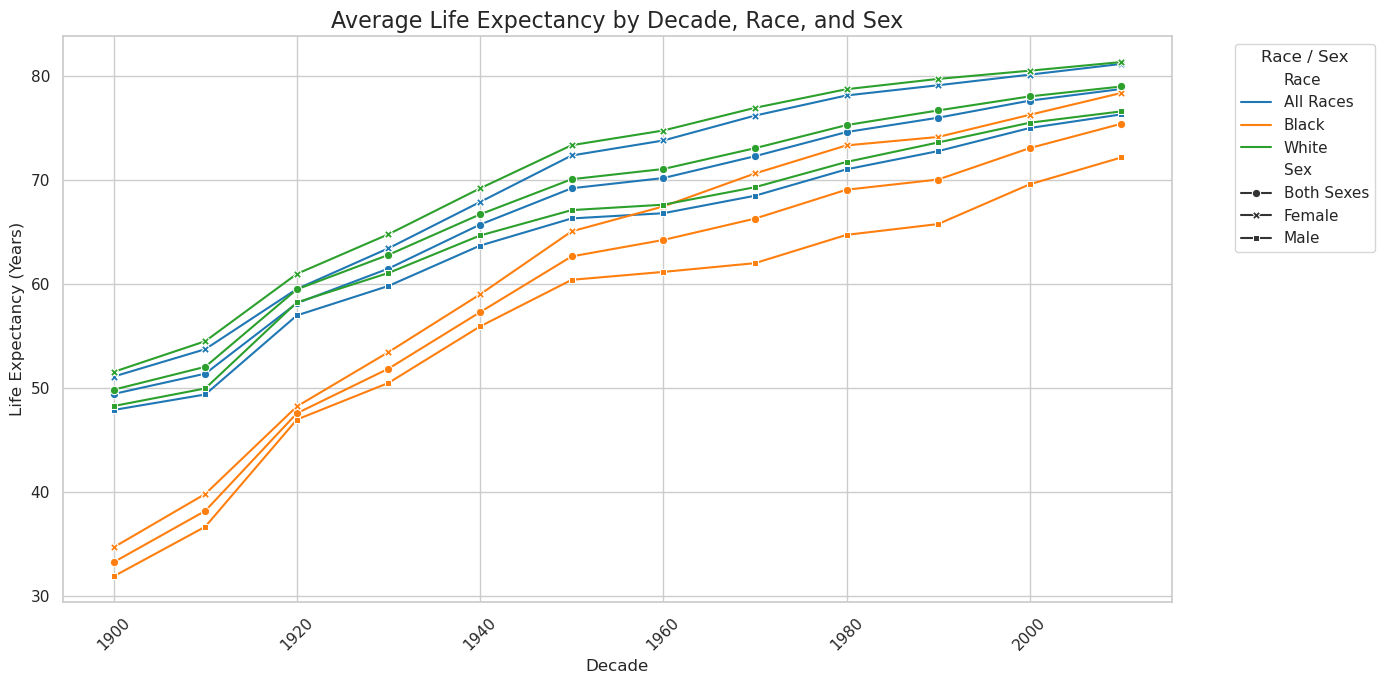

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=decade_summary,
    x="Year",
    y="LifeExpectancy",
    hue="Race",
    style="Sex",
    markers=True,
    dashes=False,
    palette="tab10"
)

plt.title("Average Life Expectancy by Decade, Race, and Sex", fontsize=16)
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Race / Sex", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


This graph shows the average life expectancy by decade for all races, including black, white, both sexes, females, and males. One of the things that stood out to me in this graph is the dramatic difference in life expectancy for black females and males. The most notable disparity is in the early 1900s, when black males had a life expectancy barely above 30 years, compared to around 50 for white males. Although average life expectancy has increased for black males over time, black males still have a lower life expectancy compared to white males by 3-4 years. Overall, life expectancy has steadily increased for all groups over the 20th century, reflecting improvements in healthcare and living conditions. One major trend I observed is that females have consistently lived longer than males across all races over the last century. No extreme outliers are present.